# CV - Image Classification - Segmentation - Autoencoders


In [1]:
import numpy as np
import re
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10, mnist, cifar100
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.applications import EfficientNetV2S, ResNet50, vgg16
from keras.utils import to_categorical 
import pandas as pd
import numpy as np
from PIL import Image
import os
import os.path
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import keras
from keras.metrics import MeanIoU
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical 
import random
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from keras.layers import LeakyReLU
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Input, Dense, BatchNormalization, Conv2D, Dropout, Conv2DTranspose, Concatenate
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from skimage import io
from skimage.util import random_noise
from skimage.transform import rotate, AffineTransform,warp
from skimage import transform, util
import random

2023-10-29 20:16:46.344172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-29 20:16:46.472147: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-29 20:16:46.504449: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-29 20:16:47.778748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


## Classification and Transfer Learning

### Exercise 1

In this exercise, we will work with the CIFAR100 dataset. 

The dataset can be import from keras datasets directly. No preprocessing is needed, you can directly use it to learn a model.

The CIFAR100 dataset has a 100 classes, each with 600 examples.

a. Let's load the dataset from keras

In [3]:
(train_X, train_y), (test_X, test_y)=cifar100.load_data()

In [4]:
train_y=to_categorical(train_y)

In [5]:
test_y=to_categorical(test_y)

b. Let's create a CNN model to learn to classify the data.

Create your model using the functional API.

In [6]:
input_layer = Input(shape=(32, 32, 3), name='input_6')
conv_layer1 = Conv2D(8, (3, 3), activation='relu', padding='same', name='conv2d_10')(input_layer)
conv_layer2 = Conv2D(16, (3, 3), activation='relu', padding='same', name='conv2d_11')(conv_layer1)
flatten_layer = Flatten(name='flatten_5')(conv_layer2)
dense_layer1 = Dense(64, activation='relu', name='dense_10')(flatten_layer)
output_layer = Dense(100, activation='softmax', name='dense_11')(dense_layer1)  # 100 classes for CIFAR-100
model = Model(inputs=input_layer, outputs=output_layer, name='cnn_basic')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "cnn_basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1048640   
                                                                 
 dense_11 (Dense)            (None, 100)               6500      
                                                                 
Total params: 1,056,532
Trainable params: 1,056,532
Non-t

2023-10-29 20:16:51.218185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-29 20:16:52.503284: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13584 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-10-29 20:16:52.505252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13584 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5


c. compile and fit the model to the data.

This process might take too long, set the number of epochs to some low value. The goal of this part is to show that this classification problem (100 classes) is complex.

In [7]:
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
# Set a low number of epochs to speed up training
epochs = 5
history = model.fit(train_X, train_y,
                    epochs=epochs,
                    batch_size=32,
                    validation_data=(test_X, test_y),
                    verbose=1)


Epoch 1/5


2023-10-29 20:16:55.596127: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


1563/1563 [==============================] - 13s 7ms/step - loss: 4.1214 - accuracy: 0.0671 - val_loss: 3.7894 - val_accuracy: 0.1140
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 3.6282 - accuracy: 0.1373 - val_loss: 3.5592 - val_accuracy: 0.1532
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 3.4436 - accuracy: 0.1665 - val_loss: 3.4669 - val_accuracy: 0.1668
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 3.3050 - accuracy: 0.1853 - val_loss: 3.3492 - val_accuracy: 0.1898
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 3.2095 - accuracy: 0.2021 - val_loss: 3.3293 - val_accuracy: 0.1905


Test loss: 3.3293
Test accuracy: 0.1905


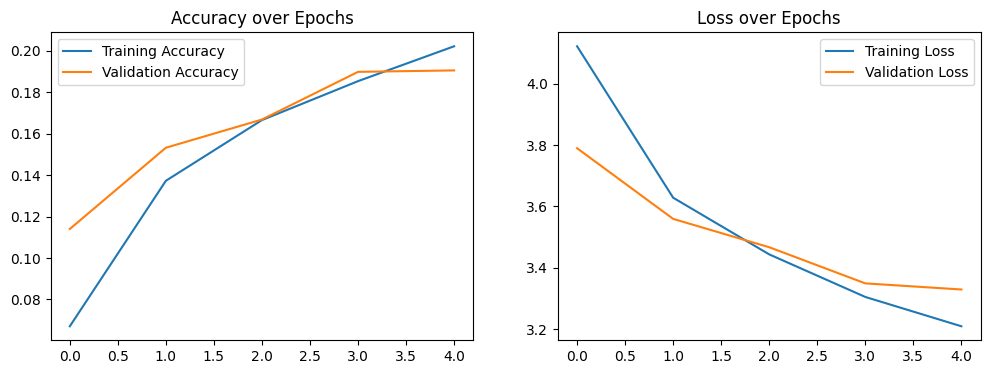

In [8]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

### Exercise 2

The model trained on CIFAR100 is probably not giving the best results you can achieve. 

Let's train the same model on CIFAR10, a version of CIFAR with only 10 classes instead of a 100.

In [9]:
(train_X, train_y), (test_X, test_y)=cifar10.load_data()

In [10]:
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

a. Recreate your basic model here, compile it and fit it to the data.

In [11]:
input_layer = Input(shape=(32, 32, 3), name='input_6')
conv_layer1 = Conv2D(8, (3, 3), activation='relu', padding='same', name='conv2d_10')(input_layer)
conv_layer2 = Conv2D(16, (3, 3), activation='relu', padding='same', name='conv2d_11')(conv_layer1)
flatten_layer = Flatten(name='flatten_5')(conv_layer2)
dense_layer1 = Dense(64, activation='relu', name='dense_10')(flatten_layer)
output_layer = Dense(100, activation='softmax', name='dense_11')(dense_layer1)  # 100 classes for CIFAR-100
model = Model(inputs=input_layer, outputs=output_layer, name='cnn_basic')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Exercise 3

Our basic CNN model does better on the CIFAR10 dataset than it did on the CIFAR100. 

The CIFAR10 is less comples, distinguishing 10 classes is a lot less complex than distinguishing a 100.

We can use transfer learning to solve this complex problem. We'll reuse the ResNet50 pretrained model from Keras, and adapt it to work on the CIFAR100.

a. Load Resnet50 from keras. Use the **imagenet** weights.

You can refer to keras to learn how to use this pretrained model, [here](https://keras.io/api/applications/resnet/).

In [12]:
pretrained = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [13]:
for i, layer in enumerate(pretrained.layers):
    print(i, layer.name, layer.output_shape)

0 input_1 [(None, 32, 32, 3)]
1 conv1_pad (None, 38, 38, 3)
2 conv1_conv (None, 16, 16, 64)
3 conv1_bn (None, 16, 16, 64)
4 conv1_relu (None, 16, 16, 64)
5 pool1_pad (None, 18, 18, 64)
6 pool1_pool (None, 8, 8, 64)
7 conv2_block1_1_conv (None, 8, 8, 64)
8 conv2_block1_1_bn (None, 8, 8, 64)
9 conv2_block1_1_relu (None, 8, 8, 64)
10 conv2_block1_2_conv (None, 8, 8, 64)
11 conv2_block1_2_bn (None, 8, 8, 64)
12 conv2_block1_2_relu (None, 8, 8, 64)
13 conv2_block1_0_conv (None, 8, 8, 256)
14 conv2_block1_3_conv (None, 8, 8, 256)
15 conv2_block1_0_bn (None, 8, 8, 256)
16 conv2_block1_3_bn (None, 8, 8, 256)
17 conv2_block1_add (None, 8, 8, 256)
18 conv2_block1_out (None, 8, 8, 256)
19 conv2_block2_1_conv (None, 8, 8, 64)
20 conv2_block2_1_bn (None, 8, 8, 64)
21 conv2_block2_1_relu (None, 8, 8, 64)
22 conv2_block2_2_conv (None, 8, 8, 64)
23 conv2_block2_2_bn (None, 8, 8, 64)
24 conv2_block2_2_relu (None, 8, 8, 64)
25 conv2_block2_3_conv (None, 8, 8, 256)
26 conv2_block2_3_bn (None, 8, 8, 256)


b. Make sure all (or at least some) layers in the pretrained ResNet-50 are not trainable.

In [14]:
for layer in pretrained.layers:
    layer.trainable = False

c. Add an output layer adequate to the task we have (predicting a 100 classes).

In [15]:
model = Sequential([
    pretrained,
    Flatten(name='flatten_7'),
    Dense(16, activation='relu', name='dense_14'),
    Dense(100, activation='softmax', name='dense_15')
], name='sequential')
model.summary()
# Load and preprocess the CIFAR-100 data
(train_X, train_y), (test_X, test_y) = cifar100.load_data()
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 16)                32784     
                                                                 
 dense_15 (Dense)            (None, 100)               1700      
                                                                 
Total params: 23,622,196
Trainable params: 34,484
Non-trainable params: 23,587,712
_________________________________________________________________


d. Compile and train your model.

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
epochs = 5
history = model.fit(train_X, train_y,
                    epochs=epochs,
                    batch_size=32,
                    validation_data=(test_X, test_y),
                    verbose=1)

Epoch 1/5
1563/1563 [==============================] - 41s 24ms/step - loss: 4.6066 - accuracy: 0.0088 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 4.6059 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/5
1563/1563 [==============================] - 37s 24ms/step - loss: 4.6059 - accuracy: 0.0092 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 4.6059 - accuracy: 0.0089 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/5
1563/1563 [==============================] - 37s 23ms/step - loss: 4.6059 - accuracy: 0.0088 - val_loss: 4.6052 - val_accuracy: 0.0100


As you train the model longer, the model will improve its accuracy.

The dataset is balanced, so "accuracy" is an adequate performance metric here.

### Exercise 4

ResNet50 shows that it can help with the CIFAR100 problem.

Let's now check whether it will allow us improve our predictions on the Breast Cancer dataset we worked with in the fist lab.

a. First, reload your images from the same dataset as before. 

Load the images in a data structure, and their correponding labels in another. Make sure that the images are aligned with their labels.

Notice that the dataset has now the images used in the first lab and their corresponding masks. We will need the masks for the segmentation exercises. Do not use them for this classification problem.

b. Resize our images. Choose The size you wish.

c. Convert the images to numpy arrays.

d. Rescale the images.

In [18]:
base_dir = '/home/jovyan/Advanced/'
np_images = []
labels = []
for folder in ['benign', 'malignant', 'normal']:
    # Get a list of all the image files in the current folder
    image_files = os.listdir(os.path.join(base_dir, folder))
    for image_file in tqdm(image_files):
        image_path = os.path.join(base_dir, folder, image_file)
        if os.path.isfile(image_path):
            img = Image.open(image_path).convert('RGB')
            # b. Resize to the desired dimensions
            img = img.resize((224, 224))  # Resize to the desired dimensions
            img = np.array(img)
            np_images.append(img)
            labels.append(folder)

# c. Convert np_images and labels to numpy arrays
np_images = np.array(np_images)
labels = np.array(labels)

# d. Rescale the images
np_images = np_images.astype('float32') / 255.0


100%|██████████| 266/266 [00:02<00:00, 102.20it/s]


e. We'll work on the multiclass classification problem. Create a **y** vector with the labels 0 for **normal**, 1 for **benign** and 2 for **malignant**.

In [19]:
y = np.zeros(len(labels), dtype=int)
for i, label in enumerate(labels):
    if label == 'normal':
        y[i] = 0
    elif label == 'benign':
        y[i] = 1
    elif label == 'malignant':
        y[i] = 2

f. Let's now create a train and test set from our data.

In [20]:
train_X, test_X, train_y, test_y = train_test_split(np_images, y, test_size=0.2, shuffle=True, random_state=4)

g. Create a model based on the ResNet50 model and see whether the results of the classification improve compared to the model you developed in the previous lab.

Note that ResNet50 might not be the best pretrained model for all tasks, keras offers other pretrained models. You can try any one of them.

In [21]:
pretrained = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    pretrained,
    Flatten(name='flatten_7'),
    Dense(16, activation='relu', name='dense_14'),
    Dense(3, activation='softmax', name='dense_15')
], name='sequential')


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
35/35 [==============================] - 20s 385ms/step - loss: 2.0373 - accuracy: 0.5408 - val_loss: 1.0907 - val_accuracy: 0.5691
Epoch 2/10
35/35 [==============================] - 11s 307ms/step - loss: 0.8225 - accuracy: 0.5926 - val_loss: 1.0809 - val_accuracy: 0.5691
Epoch 3/10
35/35 [==============================] - 11s 308ms/step - loss: 0.6603 - accuracy: 0.6942 - val_loss: 3.3163 - val_accuracy: 0.1789
Epoch 4/10
35/35 [==============================] - 11s 308ms/step - loss: 0.5370 - accuracy: 0.7350 - val_loss: 6.8201 - val_accuracy: 0.1789
Epoch 5/10
35/35 [==============================] - 11s 308ms/step - loss: 0.5097 - accuracy: 0.7940 - val_loss: 7.5713 - val_accuracy: 0.1789
Epoch 6/10
35/35 [==============================] - 11s 309ms/step - loss: 0.4783 - accuracy: 0.8321 - val_loss: 4.4152 - val_accuracy: 0.1789
Epoch 7/10
35/35 [==============================] - 11s 314ms/step - loss: 0.4261 - accuracy: 0.8666 - val_loss: 1.4244 - val_accuracy: 0.1789

In [23]:
loss, acc = model.evaluate(test_X, test_y, verbose=0)
print('Accuracy on the test set:', acc)

Accuracy on the test set: 0.20846904814243317


## Image Segmentation
Let's now shift to work on image segmentation. 
We have discussed the topic in the lecture, and said that this is a supervised learning problem in which the model learns a mapping between the image and its mask.

### Exercise 5

Let's load the images from our dataset again, this time with their corresponding masks as well.

Make an X data structure with the images, and a Y data structure with the masks.

Check that the images are aligned with their masks, otherwise the training won't work.

In [24]:
base_dir = '/home/jovyan/Advanced/'

X = []  # Images
Y = []  # Masks

def is_image_file(filename):
    return filename.endswith('.png') or filename.endswith('.jpg')

def get_mask_path(image_file, folder):
    mask_file = image_file.replace('.png', '_mask.png').replace('.jpg', '_mask.jpg')
    mask_path = os.path.join(base_dir, folder, mask_file)
    if os.path.exists(mask_path):
        return mask_path
    mask_file = image_file.replace('.png', '_mask_1.png').replace('.jpg', '_mask_1.jpg')
    mask_path = os.path.join(base_dir, folder, mask_file)
    if os.path.exists(mask_path):
        return mask_path
    return None
for folder in ['benign', 'malignant', 'normal']:
    image_files = [f for f in os.listdir(os.path.join(base_dir, folder)) if is_image_file(f) and not f.endswith('_mask.png') and not f.endswith('_mask_1.png')]
    for image_file in tqdm(image_files):
        image_path = os.path.join(base_dir, folder, image_file)
        
        mask_path = get_mask_path(image_file, folder)
        if mask_path is None:
            print(f"No mask found for image {image_file} in folder {folder}")
            continue  
            
        img = Image.open(image_path).convert('L')
        img = img.resize((224, 224))  # Resize to the desired dimensions
        img = np.array(img)
        mask = Image.open(mask_path).convert('L')
        mask = mask.resize((224, 224))  # Resize to the desired dimensions
        mask = np.array(mask)
        X.append(img)
        Y.append(mask)

# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Rescale the images and masks
X = X.astype('float32') / 255.0
Y = Y.astype('float32') / 255.0


100%|██████████| 133/133 [00:02<00:00, 62.91it/s]


### Exercise 6

Convert both images and masks from RGB mode to grayscale, and resize both to a size you see fit.

Conversion to grayscale and resizing (224,224) can be found in Exercise 5

### Exercise 7

Convert your images to numpy arrays.
The shape of the masks should be (ne=766, height, width), same goes for the images.

In [25]:
images = np.array(X)
masks = np.array(Y)
# The shape of the masks should be (ne=766, height, width), same goes for the images
print(images.shape)
print(masks.shape)

(766, 224, 224)
(766, 224, 224)


### Exercise 8
We have 766 examples with their corresponding masks, our semantic segmentation model will need more to be able to yield better results.

Apply some data augmentation techniques to generate new data.

Keep in mind that the masks need to be subjected to the same transformations you apply to the images. (if you rotate an image by 25 degrees, the mask should also be rotated with the same value). 

Creating 5 images from each image should give you around 3830 data points with their masks, which should be enough.

Check Scikit-Image for data augmentation functions that you can use, [here](https://scikit-image.org/docs/dev/api/skimage.transform.html)

In [26]:
# Assuming images and masks are your original data
images = np.array(X)  # Original images
masks = np.array(Y)   # Original masks

augmented_images = []
augmented_masks = []

# Number of augmented images to create from each original image
augments_per_image = 5

for image, mask in zip(images, masks):
    for _ in range(augments_per_image):
        # Random rotation angle between -25 and 25 degrees
        angle = random.uniform(-25, 25)
        # Random horizontal flip (50% chance)
        h_flip = random.random() > 0.5
        
        # Rotate the image and mask
        rotated_image = transform.rotate(image, angle, mode='reflect')
        rotated_mask = transform.rotate(mask, angle, mode='reflect')
        
        # Optionally flip the image and mask horizontally
        if h_flip:
            augmented_image = np.fliplr(rotated_image)
            augmented_mask = np.fliplr(rotated_mask)
        else:
            augmented_image = rotated_image
            augmented_mask = rotated_mask
        
        # Append the augmented image and mask to the lists
        augmented_images.append(augmented_image)
        augmented_masks.append(augmented_mask)


augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)
print(augmented_images.shape)
print(augmented_masks.shape)

(3830, 224, 224)
(3830, 224, 224)


Make sure you create a test set as well.

In [27]:
train_X, test_X, train_y, test_y = train_test_split(images, masks, test_size=0.25, shuffle=True, random_state=42)

### Exercise 9

Defining your U-NET architecture below. 

Make sure to use Keras' functional API.

In [28]:
def unet(input_size=(224, 224, 1)):
    inputs = Input(input_size)
    
    # Contracting Path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    p3 = MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    b1 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    
    # Expansive Path
    u1 = UpSampling2D((2, 2))(b1)
    merge1 = concatenate([u1, c3], axis=3)
    c4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(merge1)
    
    u2 = UpSampling2D((2, 2))(c4)
    merge2 = concatenate([u2, c2], axis=3)
    c5 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(merge2)
    
    u3 = UpSampling2D((2, 2))(c5)
    merge3 = concatenate([u3, c1], axis=3)
    c6 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(merge3)
    
    # Output Layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c6)
    
    return Model(inputs=inputs, outputs=outputs)

### Exercise 10

Compile and train your model. 

This might take quite some time if you're not training on a GPU.

Use the university's Jupyter environment [here](https://jupyter.utwente.nl/) or refer to Google Colab. 

In [29]:
# Create the U-Net model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history = model.fit(train_X, train_y,
                    epochs=5,
                    batch_size=32,
                    validation_data=(test_X, test_y),
                    verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 16  0           ['conv2d[0][0]']                 
                                )                                                             

### Exercise 10
Make the predictions based on your trained model, and show for a few examples (3 should be enough), the difference between what your model predicted and the ground truth mask.

6/6 [==============================] - 1s 33ms/step


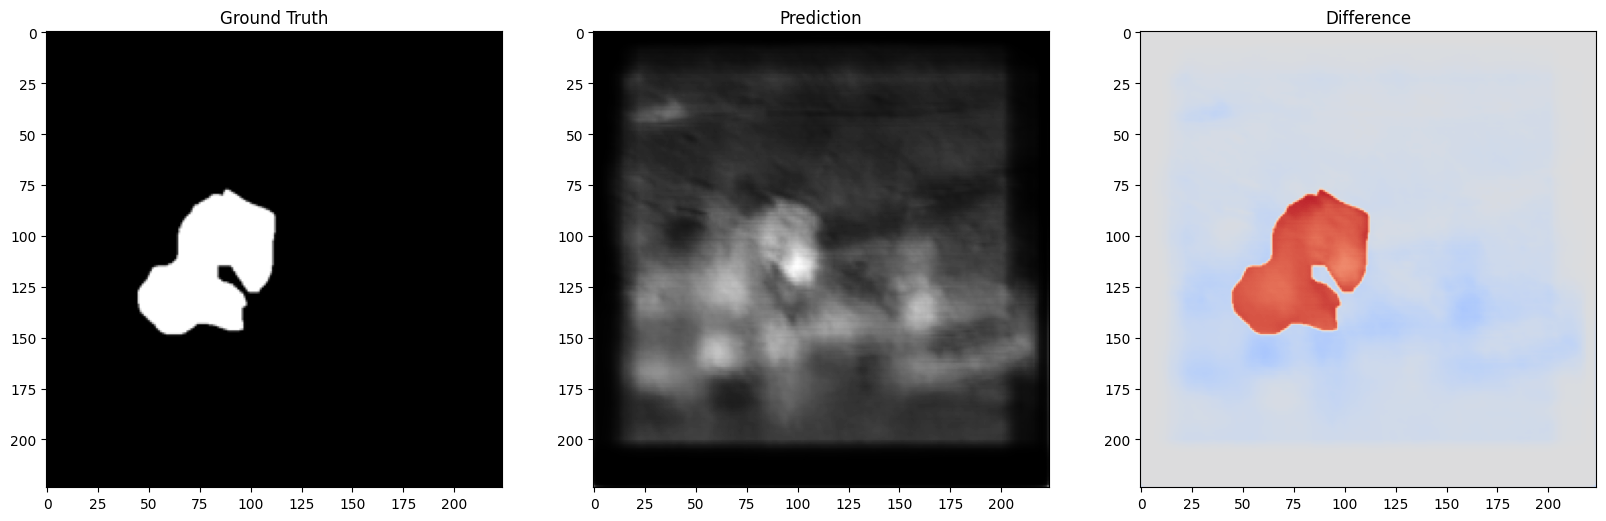

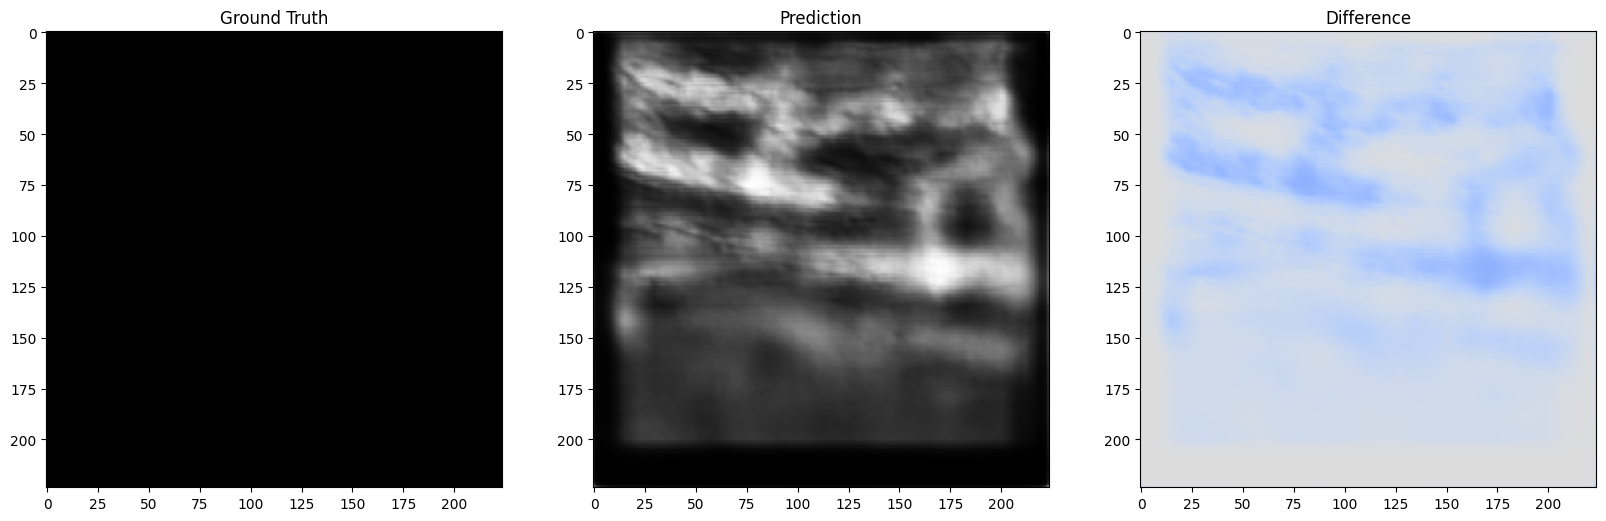

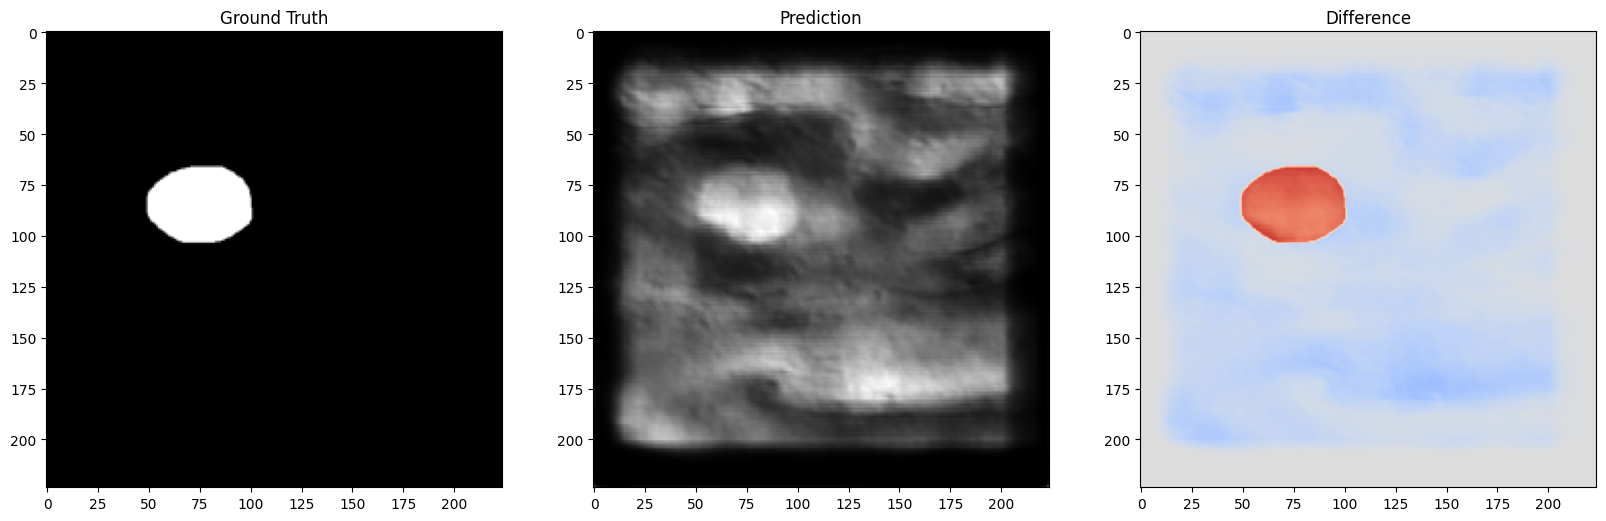

In [30]:
# Make predictions
predictions = model.predict(test_X)

# Function to plot a comparison between ground truth and prediction
def plot_comparison(index):
    fig, axs = plt.subplots(1, 3, figsize=(20, 20))
    
    # Ground truth
    axs[0].imshow(test_y[index].squeeze(), cmap='gray')
    axs[0].set_title('Ground Truth')
    
    # Prediction
    axs[1].imshow(predictions[index].squeeze(), cmap='gray')
    axs[1].set_title('Prediction')
    
    # Difference
    difference = test_y[index].squeeze() - predictions[index].squeeze()
    axs[2].imshow(difference, cmap='coolwarm', vmin=-1, vmax=1)
    axs[2].set_title('Difference')
    
    plt.show()

# Plot comparison for three examples
for i in range(3):
    plot_comparison(i)


## Denoising Autoencoders
### Exercise 11
Let's now practice autoencoder architectures that we discussed in the lecture.

We'll focus on denoising autoencoders.

First, let's load our dataset, and apply some noise to the images. 

You can apply any type of noise you want, refer to [here](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise)

In [31]:
base_dir = '/home/jovyan/Advanced/'

images = []
def is_image_file(filename):
    return filename.endswith('.png') or filename.endswith('.jpg')

for folder in ['benign', 'malignant', 'normal']:
    image_files = [f for f in os.listdir(os.path.join(base_dir, folder)) if is_image_file(f) and not f.endswith('_mask.png')]
    for image_file in tqdm(image_files):
        image_path = os.path.join(base_dir, folder, image_file)
        img = Image.open(image_path).convert('L')
        img = img.resize((224, 224)) 
        img = np.array(img)
        images.append(img)

images = np.array(images)
images = images.astype('float32') / 255.0

# Now images is ready for the next steps
images.shape

# Apply Gaussian noise
noisy_images = [random_noise(image, mode='gaussian', var=0.05**2) for image in images]
noisy_images = np.array(noisy_images)

# Ensure the noisy_images have the same shape as images
noisy_images = noisy_images.reshape(images.shape)


100%|██████████| 133/133 [00:01<00:00, 92.83it/s]


In [32]:
train_X, test_X, train_y, test_y = train_test_split(noisy_images, images, test_size=0.25, random_state=42)

### Exercise 13
Create your encoder architecture.

This should output the latent space.

In [33]:
input_img = Input(shape=(224, 224, 1))

# Add convolutional and pooling layers to downsample the image
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # the latent space representation

# The model
encoder = Model(input_img, encoded)

# Summarize the model architecture
encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 128)       7385

### Exercise 14
Create your decoder architecture.

This should input the latent space.

In [34]:
def create_decoder(encoded_shape):
    # Input layer for the encoded representations
    encoded_input = Input(shape=encoded_shape[1:])
    
    # Decoder layers
    x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(encoded_input)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    
    # Output layer to reconstruct the original image
    decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)  # Adjusted to 1 filter
    
    return Model(encoded_input, decoded)

# Recreate the decoder model using the adjusted function
decoder = create_decoder(encoder.output_shape)


### Exercise 15

Compile the autoencoder now that you have both components.

Train the autoencoder for a number of epochs of your choosing.

In [35]:
# Assuming 'encoder' and 'decoder' are your previously defined encoder and decoder models

# Define the input to the autoencoder
autoencoder_input = Input(shape=(224, 224, 1))  # assuming grayscale images

# Pass the autoencoder input through the encoder
encoded = encoder(autoencoder_input)

# Pass the encoded output through the decoder
decoded = decoder(encoded)

# Define the autoencoder model
autoencoder = Model(autoencoder_input, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the autoencoder model
autoencoder.summary()

# Now train the autoencoder using your training data
autoencoder.fit(train_y, train_X,
                epochs=10,  # adjust the number of epochs to your preference
                batch_size=128,
                shuffle=True,
                validation_data=(test_y, test_X))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 model_1 (Functional)        (None, 28, 28, 128)       92672     
                                                                 
 model_2 (Functional)        (None, 224, 224, 1)       241025    
                                                                 
Total params: 333,697
Trainable params: 333,249
Non-trainable params: 448
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 8s 828ms/step - loss: 0.1209 - val_loss: 0.0870
Epoch 2/10
5/5 [==============================] - 2s 352ms/step - loss: 0.0375 - val_loss: 0.0889
Epoch 3/10
5/5 [==============================] - 2s 359ms/step - loss: 0.0268 - val_loss: 0.0768
Epoch 4/10
5/5 [=====

### Exercise 16

Use the model to denoise the images on your test set, and show a comparison of your model's work and the ground truth (3 samples will suffice).

6/6 [==============================] - 1s 24ms/step


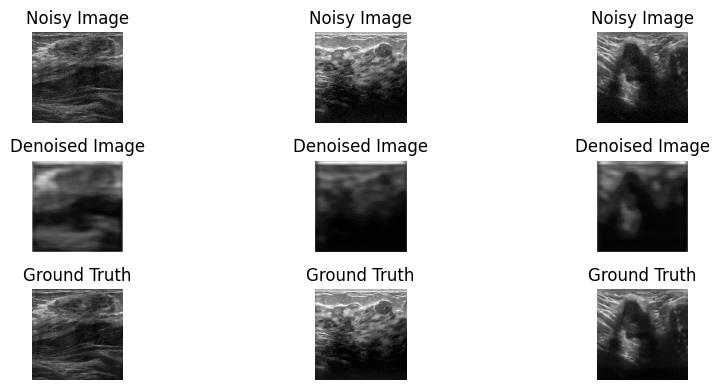

In [36]:
# Generate denoised images
denoised_images = autoencoder.predict(test_X)

# Function to display images
def display_images(noisy_images, denoised_images, ground_truth, n=3):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Display original noisy images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(224, 224), cmap='gray')
        ax.set_title('Noisy Image')
        ax.axis('off')
        
        # Display denoised images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised_images[i].reshape(224, 224), cmap='gray')
        ax.set_title('Denoised Image')
        ax.axis('off')
        
        # Display ground truth images
        ax = plt.subplot(3, n, i + 1 + n*2)
        plt.imshow(ground_truth[i].reshape(224, 224), cmap='gray')
        ax.set_title('Ground Truth')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Call the display function
display_images(test_X, denoised_images, test_y)


## Regular Part

In this part, we wish to explore how to deploy a model and make it accessible to users.

### Exercise 17

Save one of your classification models above in the  **h5** format. 

Create a web app (as simple as possible) where a user can upload an image, the app should then respond with its class.

In [37]:
#In the attached files

## Advanced Part

In this part, we wish to explore how to deploy a more complex model and make it accessible to users.

### Exercise 18

Save your denoising autoencoder model above in the  **h5** format. 

Create a web app (as simple as possible) where a user can upload an image, the app should then respond with its denoised version.

In [ ]:
#In the attached files